In this file we will handle the spiking of the PC neuron, here we analyse and generate data for different regimes with the same mutual information. These inputs will then be compared to the different outputs of the data.

In [1]:
import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

In [2]:
from brian2 import *
from matplotlib import pyplot as plt
import Documentation.parameters as p
from Foundations.helpers import scale_input_theory, make_spiketrain
from Foundations.MI import analyze_exp
import pandas as pd
import numpy as np

INFO       Cache size for target "cython": 1400 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "C:\Users\laure\.cython\brian_extensions" directory. [brian2]


In [3]:
from Old_testing.make_dynamic_experiment_ori import make_dynamic_experiments
from Old_testing.currentmodel import Barrel_PC, Barrel_IN

In [4]:
defaultclock = p.dt*ms
np.random.seed()
seed = np.random.randint(1000000000)

In [5]:
def return_spiketrain(regime):
    [input_theory, hidden_state] = make_dynamic_experiments(p.qon_qoff_type, p.baseline, p.tau, p.factor_ron_roff, p.mean_firing_rate, p.sampling_rate, p.duration)

    inj_current = scale_input_theory(input_theory, 0, 21, p.dt)

    start_scope()
    PC = Barrel_PC(p.dt, inj_current)

    PC_neuron = PC.getNeurongroup()

    PC_M = StateMonitor(PC_neuron, 'v', record=True)
    PC_S = SpikeMonitor(PC_neuron, 'v', record = True)

    run(p.duration*ms)

    return input_theory, inj_current, hidden_state, PC_M, PC_S

In [6]:
input_theory, inj_current, hidden_state, PC_M, PC_S = return_spiketrain(1)

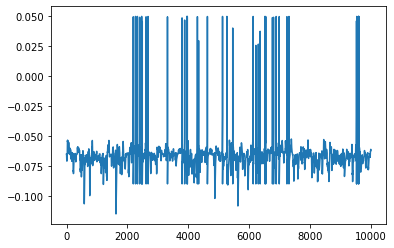

In [7]:
plot(PC_M.t / ms, PC_M.v[0], label='PC_pre')

In this next part i will be working with the visulisation of the input and why I have chosen for a certain weight for the synapse in the backward model

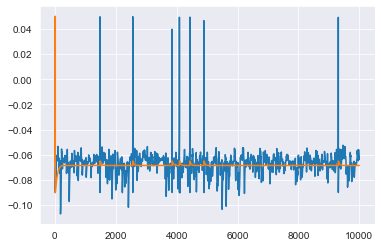

3.5


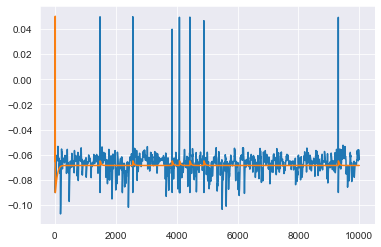

3.6


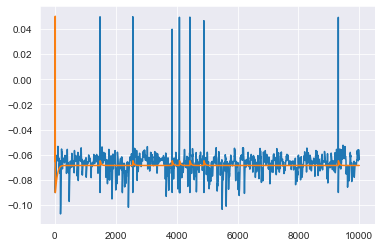

3.7


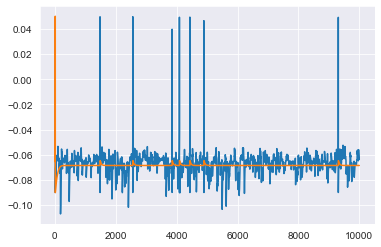

3.8000000000000003


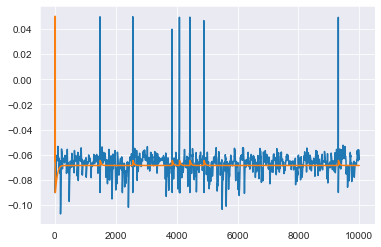

3.9000000000000004


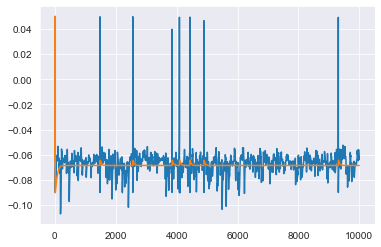

4.0


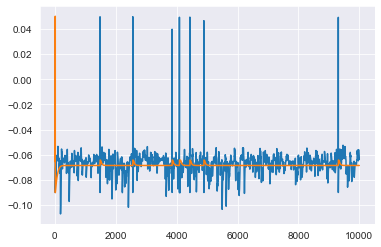

4.1000000000000005


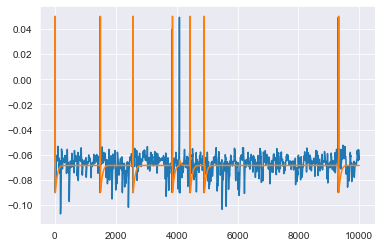

4.200000000000001


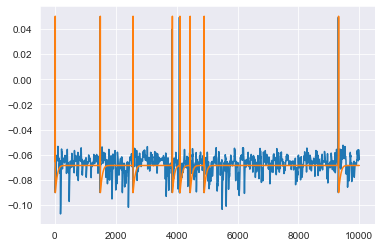

4.300000000000001


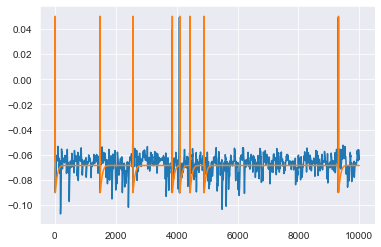

4.4


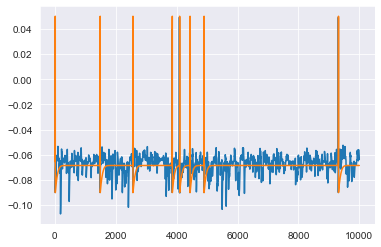

4.500000000000001


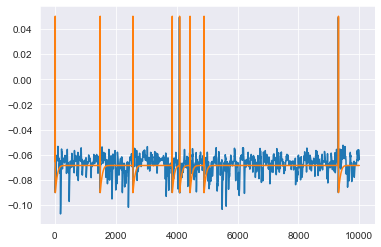

4.600000000000001


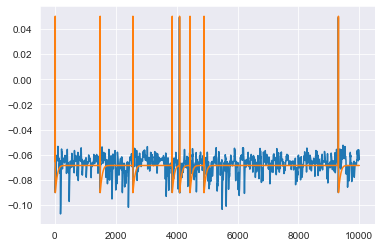

4.700000000000001


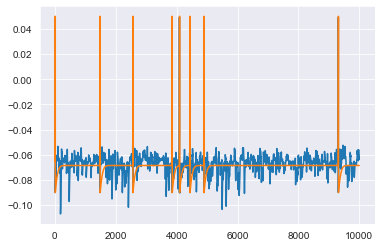

4.800000000000001


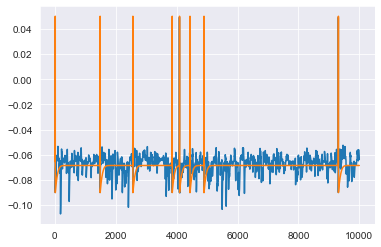

4.900000000000001


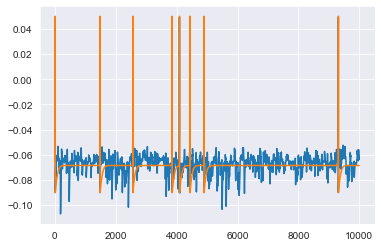

5.000000000000002


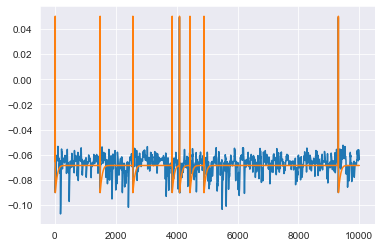

5.100000000000001


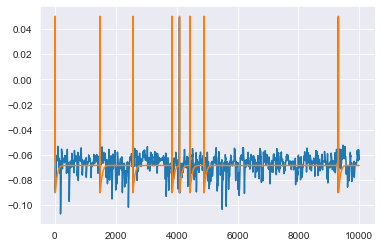

5.200000000000001


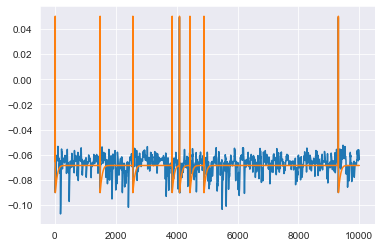

5.300000000000002


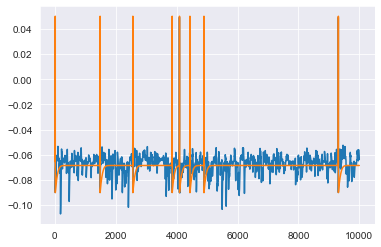

5.400000000000002


In [15]:
start_scope()
#Initialising the neuron classes
PC = Barrel_PC(p.dt, inj_current)
IN = Barrel_IN(p.dt, None, Input=False) #the barrel neuron has no input
#Getting the neuron groups
PC_neuron = PC.getNeurongroup()
IN_neuron = IN.getNeurongroup()

net2 = Network(PC_neuron,
               IN_neuron)

PC_M = StateMonitor(PC_neuron, 'v', record=True)
PC_S = SpikeMonitor(PC_neuron, 'v', record = True)
IN_M = StateMonitor(IN_neuron, 'v', record=True)
IN_S = SpikeMonitor(IN_neuron, 'v', record = True)

net2.add(PC_M, IN_M, PC_S, IN_S)
w1 = 0
#getting all the parameters for in the synapse
syn = Synapses(PC_neuron, IN_neuron, on_pre='''v_post += w1*mV''', delay=0.6 * ms, dt=p.dt * ms)
syn.connect(i=0, j=0)

syn2 = Synapses(IN_neuron, PC_neuron, on_pre='''v_post += -7*mV''', delay=0.7 * ms, dt=p.dt * ms)
syn2.connect(i=0, j=1)
net2.add(syn, syn2)

net2.store()
output = pd.DataFrame()
weights = np.arange(3.5,5.5,0.1)
samples = p.duration/p.dt

spikes_PC = []
spikes_IN = []

for w1 in weights:
    net2.restore()
    w1 = w1
    label = str(w1)
    net2.run(p.duration*ms)
    plot(PC_M.t / ms, PC_M.v[0], label='PC_pre')
    plot(IN_M.t / ms, IN_M.v[0], label='PC_pre')
    plt.show()
    spiketrain_IN = make_spiketrain(IN_S)
    print(w1)
    spiketrain_PC = make_spiketrain(PC_S)
    spikes_PC.append(np.sum(spiketrain_PC))
    spikes_IN.append(np.sum(spiketrain_IN))

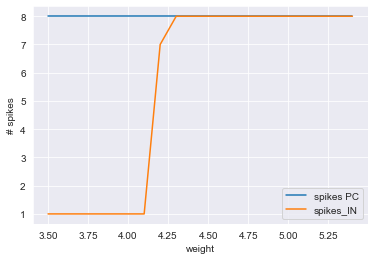

In [16]:
plt.figure()
plt.plot(weights,spikes_PC, label='spikes PC')
plt.plot(weights,spikes_IN, label='spikes_IN')
plt.xlabel('weight')
plt.ylabel('# spikes')
plt.legend()
plt.show()